# This data set is about "Bank Telemarketing"

**The problem**

The goal is to predict the Success of Bank Telemarketing.

**Problem Understanding**

The goal is to predict if the client will subscribe a bank term deposit after conducting campaign.

**Brief description about train data**

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_table("G://asif//Asif//bank-additional//bank-additional-full.csv", sep =';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Let's walk towards the details of this dataframe.
print("shape of this dataframe : " + str(df.shape))
df.info()

shape of this dataframe : (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float6

In [5]:
df.describe(include=object).transpose()

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


**Data Preprocessing**

In [5]:
# Now we will do some cleaning of the data. First, we will check for None values.
df.isnull().values.any()

False

In [6]:
# But there are missing values. 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


So, there are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. It can replace them with np.nan to make it look like actual missing values 

In [7]:
df.replace('unknown', np.nan, inplace=True)

In [8]:
#function to fill the categorical missing values
def fillmissing_object(table, col_name):
    table[col_name] = table[col_name].astype('object')
    table[col_name].fillna(table[col_name].value_counts().idxmax(), inplace=True)

In [9]:
fillmissing_object(df, 'job')
fillmissing_object(df, 'marital')
fillmissing_object(df, 'education')
fillmissing_object(df, 'default')
fillmissing_object(df, 'housing')
fillmissing_object(df, 'loan')

**Visualization of inter-feature relationship**

We will start with exploring of "y"(has the client subscribed a term deposit). 

In [10]:
df['y'].describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

**Relation between euribor 3 month rate(Euribor is short for Euro Interbank Offered Rate) and employment variation rate**

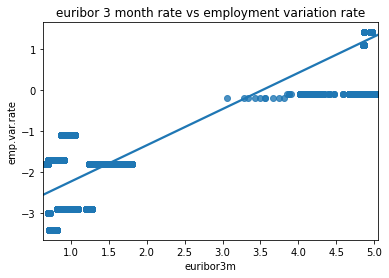

In [11]:
sns.regplot(x="euribor3m", y="emp.var.rate", data=df)
plt.title("euribor 3 month rate vs employment variation rate")
plt.show()

In [12]:
df["euribor3m"].corr(df["emp.var.rate"])

0.9722446711516126

So euribor 3 month rate and employment variation rate is strongly correlated. 

In [15]:
df["cons.price.idx"].corr(df["cons.conf.idx"])

0.05898618174886828

**Does cons.conf.idx(consumer confidence index) has any impact on y(subscripsion)?**

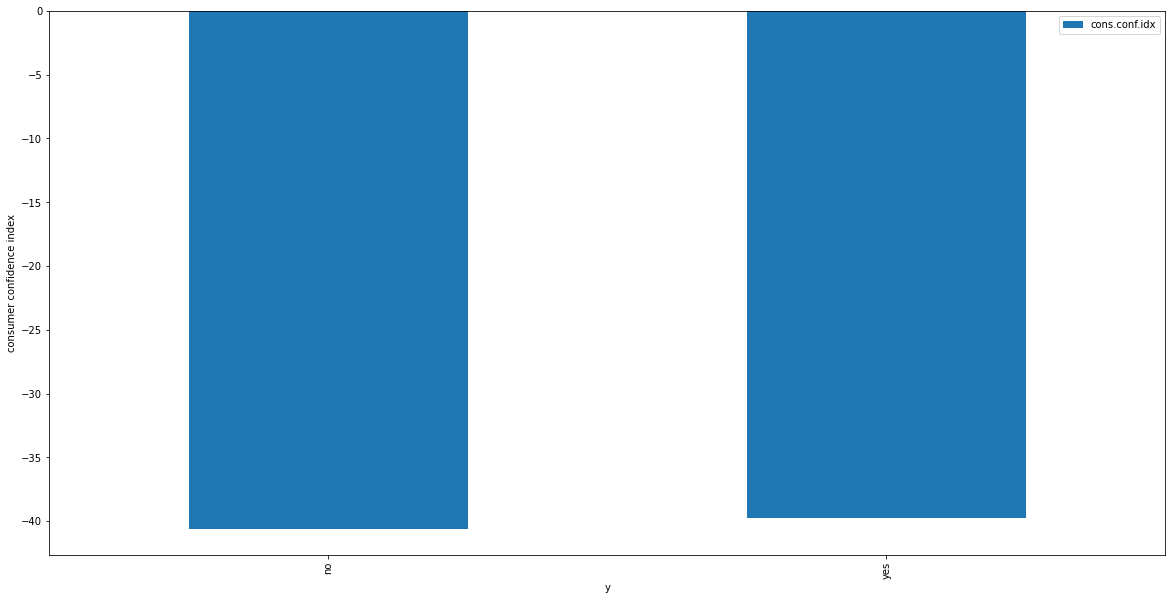

In [16]:
mean_price = df[['y', 'cons.conf.idx']].groupby('y').mean()
mean_price.sort_values(by='cons.conf.idx', ascending=True, inplace=True)
mean_price.plot(kind='bar', figsize=(20,10))
plt.ylabel('consumer confidence index')
plt.show()

In [17]:
grouped_test = df[['y', 'cons.conf.idx']].groupby(['y'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('yes')['cons.conf.idx'], 
                              grouped_test.get_group('no')['cons.conf.idx'])
print("The F score is {} and p-value is {}".format(f_val, p_val))

The F score is 124.40997473764618 and p-value is 7.536664996677877e-29


Since f_val is high and p_val is low so consumer confidence index has strong impact upon subscripsion.

**Does cons.price.idx(consumer price index) has any impact on y(subscripsion)?**

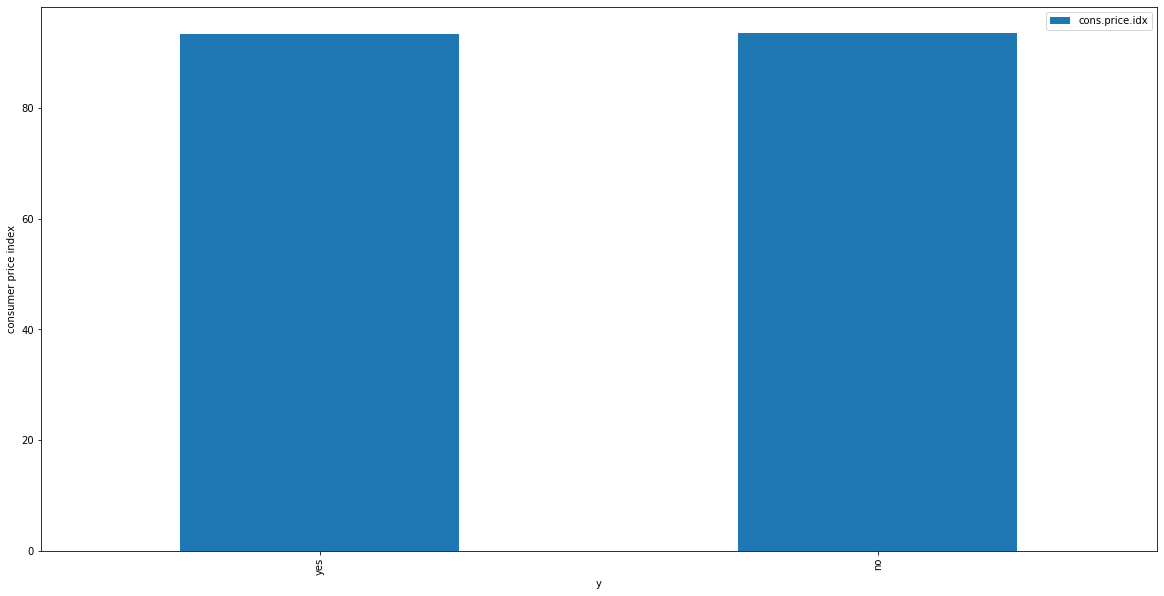

In [18]:
mean_price = df[['y', 'cons.price.idx']].groupby('y').mean()
mean_price.sort_values(by='cons.price.idx', ascending=True, inplace=True)
mean_price.plot(kind='bar', figsize=(20,10))
plt.ylabel('consumer price index')
plt.show()

In [19]:
grouped_test = df[['y', 'cons.price.idx']].groupby(['y'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('yes')['cons.price.idx'], 
                              grouped_test.get_group('no')['cons.price.idx'],) 
print("The F score is {} and p-value is {}".format(f_val, p_val))                

The F score is 778.5897856865704 and p-value is 9.318964779626731e-170


Since f_val is high and p_val is low so consumer price index has strong impact upon subscripsion.

# We will describe relation between categorical and numerical data.

In [20]:
grouped_test = df[['y', 'emp.var.rate']].groupby(['y'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('yes')['emp.var.rate'], 
                              grouped_test.get_group('no')['emp.var.rate'],) 
print("The F score is {} and p-value is {}".format(f_val, p_val))

The F score is 4023.8299254823432 and p-value is 0.0


In [21]:
grouped_test = df[['y', 'euribor3m']].groupby(['y'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('yes')['euribor3m'], 
                              grouped_test.get_group('no')['euribor3m'],) 
print("The F score is {} and p-value is {}".format(f_val, p_val))                

The F score is 4309.479048107806 and p-value is 0.0


In [22]:
grouped_test = df[['y', 'nr.employed']].groupby(['y'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('yes')['nr.employed'], 
                              grouped_test.get_group('no')['nr.employed'],) 
print("The F score is {} and p-value is {}".format(f_val, p_val))                

The F score is 5926.610646027712 and p-value is 0.0


In [23]:
grouped_test = df[['y', 'age']].groupby(['y'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('yes')['age'], 
                              grouped_test.get_group('no')['age'],) 
print("The F score is {} and p-value is {}".format(f_val, p_val))                

The F score is 38.09465928898563 and p-value is 6.802136418528356e-10


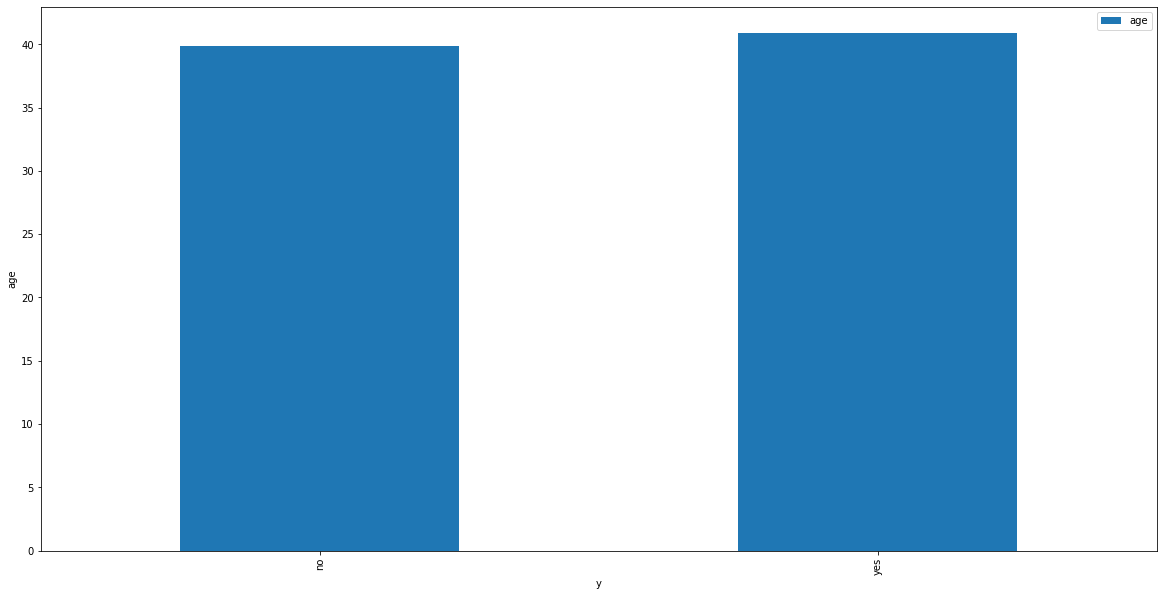

In [24]:
mean_price = df[['y', 'age']].groupby('y').mean()
mean_price.sort_values(by='age', ascending=True, inplace=True)
mean_price.plot(kind='bar', figsize=(20,10))
plt.ylabel('age')
plt.show()

In [25]:
grouped_test = df[['y', 'duration']].groupby(['y'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('yes')['duration'], 
                              grouped_test.get_group('no')['duration'],) 
print("The F score is {} and p-value is {}".format(f_val, p_val))

The F score is 8094.101634460994 and p-value is 0.0


In [26]:
grouped_test = df[['y', 'pdays']].groupby(['y'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('yes')['pdays'], 
                              grouped_test.get_group('no')['pdays'],) 
print("The F score is {} and p-value is {}".format(f_val, p_val))

The F score is 4861.173272049225 and p-value is 0.0


In [27]:
grouped_test = df[['y', 'campaign']].groupby(['y'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('yes')['campaign'], 
                              grouped_test.get_group('no')['campaign'],) 
print("The F score is {} and p-value is {}".format(f_val, p_val))

The F score is 182.1566728779567 and p-value is 2.007779990638697e-41


# We will describe relation between categorical and categorical data.

In [28]:
def chi_sq_test(DF, var1, var2):
    dataset_table = pd.crosstab(DF[var1], DF[var2])
    print('contingency table between {} and {} is:\n'.format(var1, var2))
    print(dataset_table)
    val = stats.chi2_contingency(dataset_table)
    Observed_Values = dataset_table.values 
    Expected_Values = val[-1]
    no_of_rows = dataset_table.shape[0]
    no_of_columns = dataset_table.shape[1]
    ddof = (no_of_rows-1)*(no_of_columns-1)
    print("\nDegree of Freedom:-",ddof)
    alpha = 0.05
    chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    critical_value = stats.chi2.ppf(q=1-alpha,df=ddof)
    p_value = 1-stats.chi2.cdf(x=chi_square_statistic,df=ddof)
    
    if chi_square_statistic>=critical_value and p_value<=alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a relationship between 2 categorical variables".format(chi_square_statistic, p_value))
    elif chi_square_statistic>=critical_value and p_value>alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a weak relationship between 2 categorical variables, but not evident enough".format(chi_square_statistic, p_value))
    else:
        print("chi_square_statistic is {} and p-value is {}. So, these 2 variables are not related at all.".format(chi_square_statistic, p_value))

In [29]:
chi_sq_test(df, 'education', 'y')

contingency table between education and y is:

y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    11978  1921

Degree of Freedom:- 6
chi_square_statistic is 192.19357138106227 and p-value is 0.0. So, there is a relationship between 2 categorical variables


In [30]:
chi_sq_test(df, 'housing', 'y')

contingency table between housing and y is:

y           no   yes
housing             
no       16596  2026
yes      19952  2614

Degree of Freedom:- 1
chi_square_statistic is 5.0612115399779665 and p-value is 0.024467127999793004. So, there is a relationship between 2 categorical variables


In [31]:
chi_sq_test(df, 'default', 'y')

contingency table between default and y is:

y           no   yes
default             
no       36545  4640
yes          3     0

Degree of Freedom:- 1
chi_square_statistic is 0.38089673747930686 and p-value is 0.5371237079759434. So, these 2 variables are not related at all.


In [32]:
chi_sq_test(df, 'marital', 'y')

contingency table between marital and y is:

y            no   yes
marital              
divorced   4136   476
married   22464  2544
single     9948  1620

Degree of Freedom:- 2
chi_square_statistic is 120.78428938616787 and p-value is 0.0. So, there is a relationship between 2 categorical variables


In [33]:
chi_sq_test(df, 'job', 'y')

contingency table between job and y is:

y                no   yes
job                      
admin.         9363  1389
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144

Degree of Freedom:- 10
chi_square_statistic is 960.2507491275792 and p-value is 0.0. So, there is a relationship between 2 categorical variables


In [45]:
chi_sq_test(df, 'loan', 'y')

contingency table between loan and y is:

y        no   yes
loan             
no    30983  3957
yes    5565   683

Degree of Freedom:- 1
chi_square_statistic is 0.8215442912201592 and p-value is 0.3647290379789643. So, these 2 variables are not related at all.


In [46]:
chi_sq_test(df, 'contact', 'y')

contingency table between contact and y is:

y             no   yes
contact               
cellular   22291  3853
telephone  14257   787

Degree of Freedom:- 1
chi_square_statistic is 863.269080747908 and p-value is 0.0. So, there is a relationship between 2 categorical variables


In [47]:
chi_sq_test(df, 'day_of_week', 'y')

contingency table between day_of_week and y is:

y              no   yes
day_of_week            
fri          6981   846
mon          7667   847
thu          7578  1045
tue          7137   953
wed          7185   949

Degree of Freedom:- 4
chi_square_statistic is 26.14493907587197 and p-value is 2.9584820052774852e-05. So, there is a relationship between 2 categorical variables


In [48]:
chi_sq_test(df, 'month', 'y')

contingency table between month and y is:

y         no  yes
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256

Degree of Freedom:- 9
chi_square_statistic is 3101.1493514116773 and p-value is 0.0. So, there is a relationship between 2 categorical variables


In [49]:
chi_sq_test(df, 'poutcome', 'y')

contingency table between poutcome and y is:

y               no   yes
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894

Degree of Freedom:- 2
chi_square_statistic is 4230.5237978319765 and p-value is 0.0. So, there is a relationship between 2 categorical variables
